# In vehicle coupon recommendation 

## Table of contents
- [1 - Packages](#1) 
- [2 - Explornatory Data Analysis](#2)
- [3 - Feature Enigineering](#3)
- [4 - Classification Models](#4)
- [5 - Clustering](#5)

# 0 Load Package

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.feature_selection import chi2
from scipy import stats
from pandas import read_csv
from sklearn.model_selection import train_test_split

# 1 Data Preprocessing

## 1.1 Know your data

### 1.1.1 Show the first 5 records

In [16]:
df = pd.read_csv("Vehicle_Coupon.csv")
df.head()
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.1.2 Dimension

In [18]:
df.shape

(12684, 26)

### 1.1.3 Features Explanations

### 1.1.4 Features Statistics

In [19]:
df.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [20]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.1.5 Null or not

In [21]:
df.isnull().sum() / df.shape[0] * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

## 1.2 Data Cleaning and transformation

### 1.2.1 Drop car column

In [22]:
df.drop(columns='car', inplace=True)
# df.columns

### 1.2.2 Set data type as category

In [23]:
df = df.astype('category')
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children            category
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min        category
toCoupon_GEQ15min       category
toCoupon_GEQ25min       category
direction_same          category
direction_opp           category
Y                       category
dtype: object

### 1.2.2 Impute lack data

[Ref](https://jamesrledoux.com/code/imputation#:~:text=One%20approach%20to%20imputing%20categorical,given%20in%20Pandas'%20value_counts%20function.)

In [24]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isnull().sum().sum()

0

## 2 Exploratory Data Analysis

## 2.1 Coupon acception vs. reject

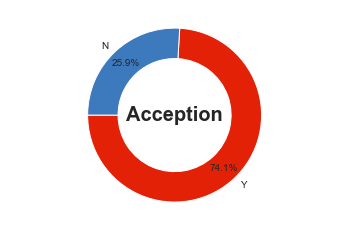

In [25]:
def make_pie(sizes, text,colors,labels):

    col = [[i/255. for i in c] for c in colors]

    fig, ax = plt.subplots()
    ax.axis('equal')
    width = 0.35
    kwargs = dict(colors=col, startangle=180, autopct='%1.1f%%')
    outside, _, _ = ax.pie(sizes, radius=1, pctdistance=1-width/2,
                       labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    plt.show()

c1 = (226,33,7)
c2 = (60,121,189)

make_pie([257,90], "Acception",[c1,c2],['Y','N'])


## 2.2 Which feature will be indepedent of target?

[Ref](https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjFiZDY4NWY1ZThmYzYyZDc1ODcwNWMxZWIwZThhNzUyNGM0NzU5NzUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NTc1NzcwNTcsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNjk2NjQyODk4MDIxNTU1MjE0OSIsImVtYWlsIjoieWFubWluZ2xpdTIxQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiWWFubWluZyBMaXUiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUl0YnZtbW1DdnlEVzktaWF0dXQzYXhlQWFlZGpIWV9TY2laNWI4M3dfLTY9czk2LWMiLCJnaXZlbl9uYW1lIjoiWWFubWluZyIsImZhbWlseV9uYW1lIjoiTGl1IiwiaWF0IjoxNjU3NTc3MzU3LCJleHAiOjE2NTc1ODA5NTcsImp0aSI6IjhmMmJjM2MwOTk2NDZmMDdiODBhYTZmNWE5OGY5ZGU0YTk3YzAxMTQifQ.Tvz3S-XbT029APxcmsPETDBUj8S1ir0iYejfv9QbpWLtuCDYwxxbDuQv1FCL9Wz_D8hmxPutvuOgrF-dFT5oMYTq6rn0hV8Z0UNNn8rBR_KofiuSx10ChpZgJfmMAtqccsfW20Yk__v_xvZPNOLnjiHdXZAtoQiWUNo9VFAZ58NM98KjLfkkJ0r715iuIQrnyzWnUnabgwO96GT1OTaLynipdg6ugvClNENa3WZIncBtdqlP4jeTE7QOEPnTMRUntHGCTj5VRsnJRYt3OYpE6BqQgANptFUygI-K47IM5WSAicSFzmxyp9CgJxQ3U4d4S3LPKqiBy63v7gkxkLJPhQ)

<AxesSubplot:>

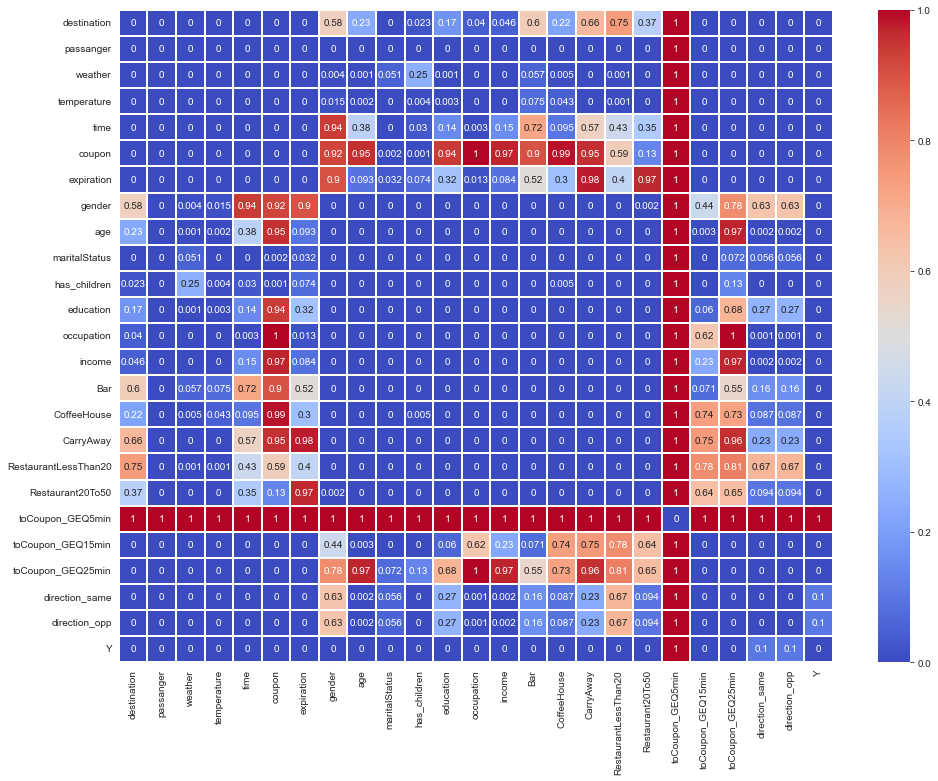

In [26]:
df = df.astype('object')
column_names=df.columns

chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)


outercnt=0
innercnt=0
for icol in column_names:
    for jcol in column_names:
       mycrosstab=pd.crosstab(df[icol],df[jcol])
       stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       innercnt=innercnt+1
    outercnt=outercnt+1
    innercnt=0
    

plt.figure(figsize = (16,12))
sns.heatmap(chisqmatrix.astype(np.float64), annot=True,linewidths=0.1, 
            cmap='coolwarm')

# Question: 2 perspectives here. If we see the bottom row of this heatmap, 
# we can easily remove those with bigger p values with alpha = .05 for they 
# are indepdent. How do we deal those variables among features for a relatie
# small value?

## 2.3 How do the rest of feature will influence the target ?

[Ref](https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib)

c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


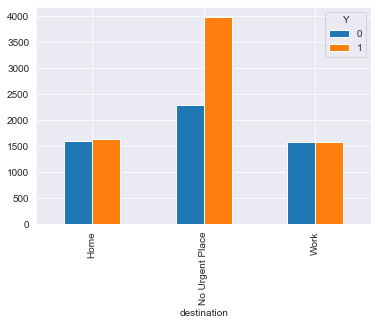

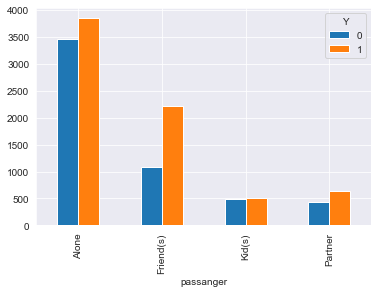

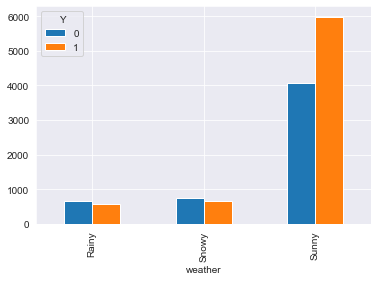

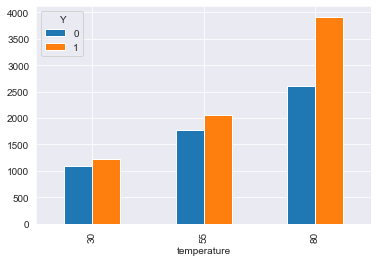

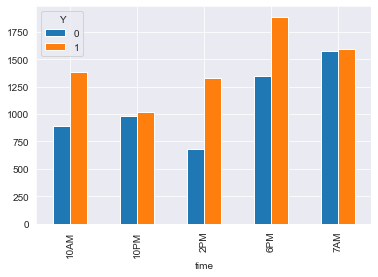

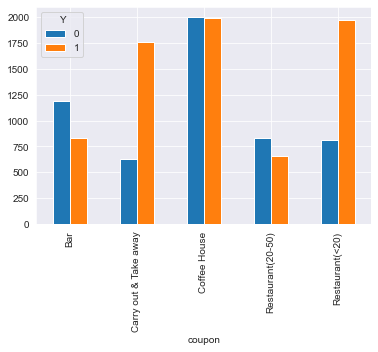

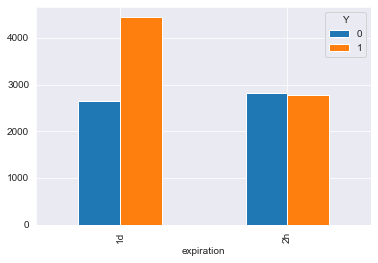

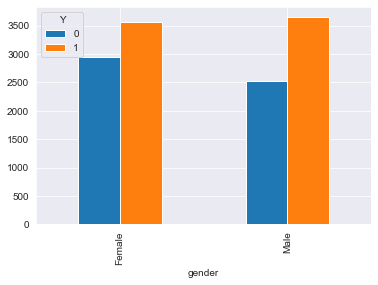

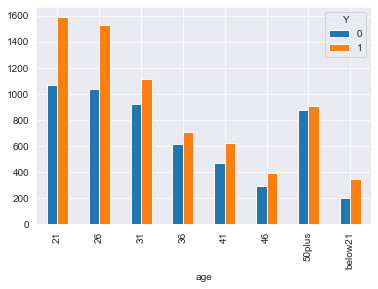

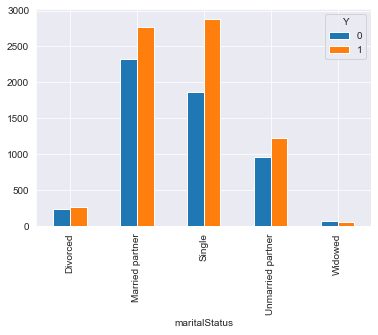

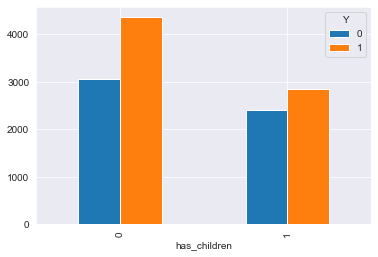

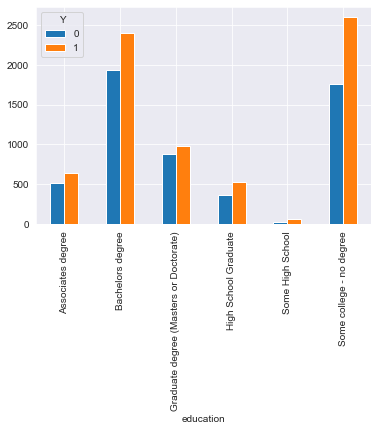

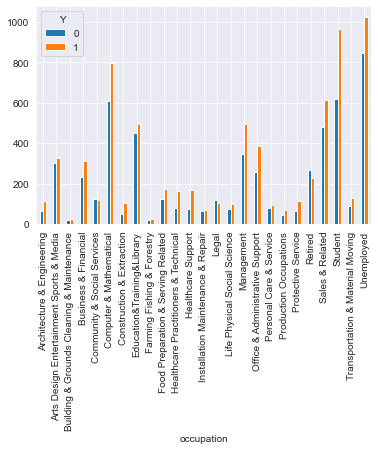

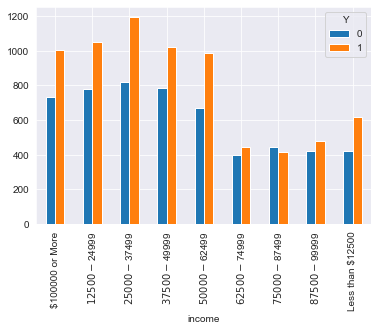

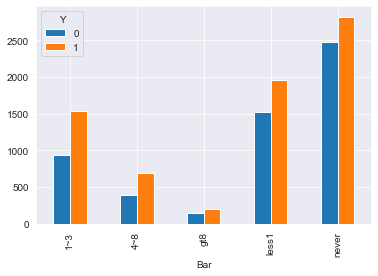

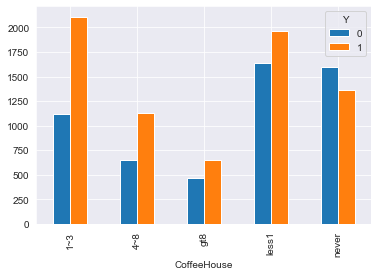

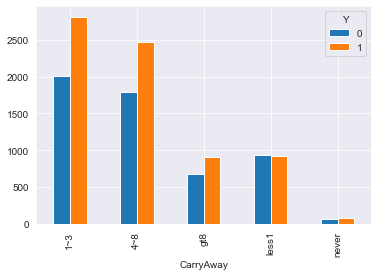

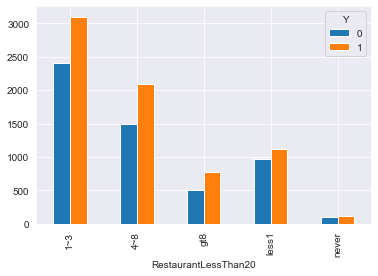

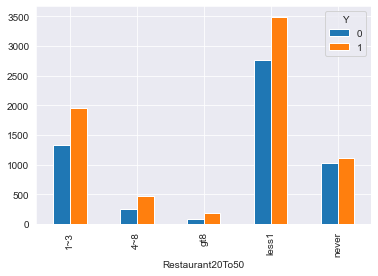

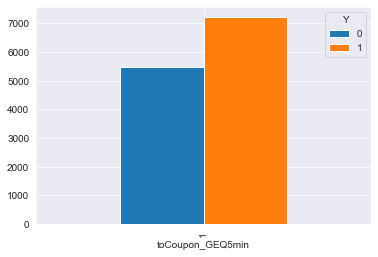

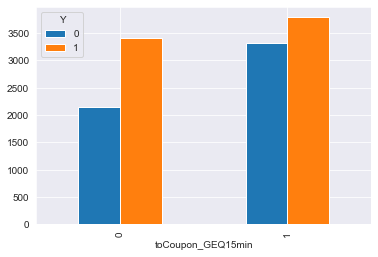

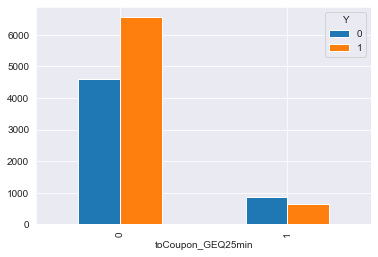

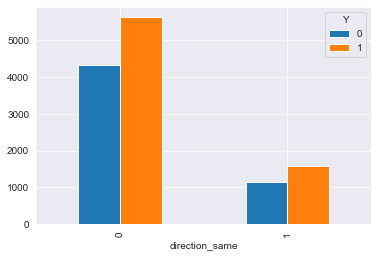

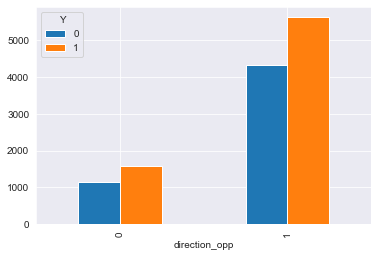

In [27]:
count = 0
target = df.columns[-1]
for cat_val in df.columns:
  if cat_val == target: 
    continue
  temp_df = df.loc[:, [cat_val, target]]  
  temp_df = temp_df.groupby([cat_val, target]).size().reset_index(name='count')
  pivot_df = pd.pivot_table(temp_df, values='count', index=cat_val, columns=target)
  pivot_df.plot(kind='bar')
  count += 1

<a name='3'></a>
## 3 - Feature Engineering

<a name='3-1'></a>
### 3.1 -  Feature selection
We assume that the target and features are related only the confidence is above 95 percent. By observing the bottom row in the heatmap in section 2.2, those 3 columns, **toCoupon_GEQ5min, direction_same, direction_opp**, are removed as not meeting the confidence conditions.

In [28]:
df_droped = df.drop(columns = ['toCoupon_GEQ5min', 'direction_same', 'direction_opp'])
print(len(df.columns))
print(len(df_droped.columns))
df_droped.to_csv('Clean_Data_0.csv')

25
22


<a name=3-2></a>
### 3.2 - Feature encoding

In [29]:
for i in df_droped.columns:
    print(i, df_droped[i].unique(), '\n')

destination ['No Urgent Place' 'Home' 'Work'] 

passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather ['Sunny' 'Rainy' 'Snowy'] 

temperature [55 80 30] 

time ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration ['1d' '2h'] 

gender ['Female' 'Male'] 

age ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children [1 0] 

education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Commu

#### 3.2.1 - Load dataset 

Numpy

In [30]:
def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values
    
    X = dataset[:, :-1]
    y = dataset[:,-1]
    
    X = X.astype(str)
    y = y.reshape((len(y), 1))
    return X, y

In [31]:
# Test 
X, y = load_dataset('Clean_Data_0.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

(8879, 22) (3806, 22) (8879, 1) (3806, 1)


array([['1202.0', 'No Urgent Place', 'Kid(s)', ..., 'less1', '1', '0'],
       ['4173.0', 'No Urgent Place', 'Alone', ..., 'less1', '0', '0'],
       ['5842.0', 'Home', 'Alone', ..., '1~3', '0', '0'],
       ...,
       ['9844.0', 'Home', 'Alone', ..., 'less1', '1', '1'],
       ['10798.0', 'No Urgent Place', 'Friend(s)', ..., '4~8', '0', '0'],
       ['2731.0', 'Work', 'Alone', ..., '1~3', '0', '0']], dtype='<U41')

Pandas

In [32]:
df_droped.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0


In [33]:
target = ['Y']
XP = df_droped.drop(columns = target)
yP = df_droped[target]
XTrain, XTest, yTrain, yTest = train_test_split(XP, yP, test_size=0.3, random_state=0)
XTrain.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,31,Single,...,Graduate degree (Masters or Doctorate),Legal,$75000 - $87499,gt8,4~8,4~8,4~8,4~8,0,0
8643,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,26,Married partner,...,Bachelors degree,Unemployed,$87500 - $99999,1~3,less1,1~3,less1,less1,0,0
5931,Home,Alone,Sunny,80,10PM,Bar,1d,Female,21,Single,...,Some college - no degree,Student,Less than $12500,gt8,gt8,1~3,less1,never,1,0
7188,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,46,Single,...,Graduate degree (Masters or Doctorate),Computer & Mathematical,$37500 - $49999,never,gt8,1~3,4~8,less1,0,0
6279,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,36,Single,...,Some college - no degree,Computer & Mathematical,$37500 - $49999,less1,1~3,4~8,1~3,less1,1,0


<a name='3-2-2'></a>
#### 3.2.2 - Ordinal encoding

In [43]:
#!pip install category_encoders
import category_encoders as ce

[Encoding categorical variables](https://kiwidamien.github.io/encoding-categorical-variables.html)\
[Target Encoding](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)

In [44]:
def ordinal_encoder(train, test, columns):
    oe = ce.OrdinalEncoder(cols=columns, return_df=True)
    train_transformed = oe.fit_transform(train)
    test_transformed = oe.transform(test)
    return train_transformed, test_transformed

In [45]:
print(df_droped.columns)
ordial_columns = ['age', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
XTrain_after_ordinal, XTest_after_ordinal = ordinal_encoder(XTrain, XTest, ordial_columns)
display(XTrain.head())
display(XTest.head())
display(XTrain_after_ordinal.head())
display(XTest_after_ordinal.head())

# Question: Are time, temprature the ordinal variables?

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'Y'],
      dtype='object')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,31,Single,...,Graduate degree (Masters or Doctorate),Legal,$75000 - $87499,gt8,4~8,4~8,4~8,4~8,0,0
8643,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,26,Married partner,...,Bachelors degree,Unemployed,$87500 - $99999,1~3,less1,1~3,less1,less1,0,0
5931,Home,Alone,Sunny,80,10PM,Bar,1d,Female,21,Single,...,Some college - no degree,Student,Less than $12500,gt8,gt8,1~3,less1,never,1,0
7188,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,46,Single,...,Graduate degree (Masters or Doctorate),Computer & Mathematical,$37500 - $49999,never,gt8,1~3,4~8,less1,0,0
6279,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,36,Single,...,Some college - no degree,Computer & Mathematical,$37500 - $49999,less1,1~3,4~8,1~3,less1,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
12370,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,26,Single,...,Bachelors degree,Unemployed,$12500 - $24999,1~3,less1,4~8,1~3,less1,0,0
8332,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,1d,Female,41,Married partner,...,Graduate degree (Masters or Doctorate),Computer & Mathematical,$75000 - $87499,less1,4~8,gt8,1~3,less1,1,0
8917,No Urgent Place,Friend(s),Rainy,55,10PM,Restaurant(20-50),2h,Male,36,Single,...,Graduate degree (Masters or Doctorate),Unemployed,Less than $12500,never,less1,less1,4~8,less1,1,0
6057,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Female,26,Single,...,High School Graduate,Unemployed,Less than $12500,less1,less1,4~8,1~3,never,1,1
10644,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,21,Unmarried partner,...,Some college - no degree,Student,Less than $12500,less1,1~3,4~8,4~8,1~3,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,1,Single,...,1,Legal,1,1,1,1,1,1,0,0
8643,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,2,Married partner,...,2,Unemployed,2,2,2,2,2,2,0,0
5931,Home,Alone,Sunny,80,10PM,Bar,1d,Female,3,Single,...,3,Student,3,1,3,2,2,3,1,0
7188,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,4,Single,...,1,Computer & Mathematical,4,3,3,2,1,2,0,0
6279,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,5,Single,...,3,Computer & Mathematical,4,4,4,1,3,2,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
12370,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,2,Single,...,2,Unemployed,6,2,2,1,3,2,0,0
8332,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,1d,Female,7,Married partner,...,1,Computer & Mathematical,1,4,1,3,3,2,1,0
8917,No Urgent Place,Friend(s),Rainy,55,10PM,Restaurant(20-50),2h,Male,5,Single,...,1,Unemployed,3,3,2,5,1,2,1,0
6057,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Female,2,Single,...,5,Unemployed,3,4,2,1,3,3,1,1
10644,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,3,Unmarried partner,...,3,Student,3,4,4,1,1,4,1,0


In [46]:
def ordinal_encoding(clean_df):
    frequency_map = {
        'never': 0,
        'less1': 1,
        '1~3': 2,
        '4~8': 3,
        'gt8': 4
    }
    
    age_map = {
        'below21': 0,
        '21': 1,
        '26': 2,
        '31': 3,
        '36': 4,
        '41': 5,
        '46': 6,
        '50plus': 7
    }
    
    income_map = {
        'Less than $12500': 0,
        '$12500 - $24999': 1,
        '$25000 - $37499': 2,
        '$37500 - $49999': 3,
        '$50000 - $62499': 4,
        '$62500 - $74999': 5,
        '$75000 - $87499': 6,
        '$87500 - $99999': 7,
        '$100000 or More': 8
    }
    
    frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20',
                      'CarryAway', 'CoffeeHouse', 'Bar']

    
    education_map = {
        'Some High School': 0, 
        'High School Graduate': 1,
        'Some college - no degree': 2,
        'Associates degree': 3,
        'Bachelors degree': 4,
        'Graduate degree (Masters or Doctorate)': 5
    }
        
    
    for col in frequency_cols:
        clean_df[col] = clean_df[col].map(frequency_map)
    clean_df.age = clean_df.age.map(age_map)
    clean_df.income = clean_df.income.map(income_map)
    clean_df.education = clean_df.education.map(education_map)

    return clean_df

In [47]:
df_droped.education.unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [48]:
df_droped.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0


<a name = '3-2-2'></a>
#### 3.2.2 - One hot encoding

In [49]:
from sklearn.preprocessing import OneHotEncoder


def one_hot_encoding(train, test, columns):
    oe = ce.OneHotEncoder(cols=columns, return_df=True)
    train_transformed = oe.fit_transform(train)
    test_transformed = oe.transform(test)
    return train_transformed, test_transformed


In [50]:
train_after_one_hot_encoding, test_after_one_hot_encoding = one_hot_encoding(XTrain, XTest, columns=[i for i in XTrain.columns if i not in ordial_columns])
display(train_after_one_hot_encoding.head())
display(test_after_one_hot_encoding.head())
display(train_after_one_hot_encoding.age)



TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

<a name = '3-2-3'></a>
#### 3.2.3 - Frequency and target encoding

In [51]:
def target_encoding(train, ytrain, test, columns):
    ytrain = ytrain.astype(float)
    oe = ce.TargetEncoder(return_df=True)

    train_transformed = oe.fit_transform(train[columns], ytrain[ytrain.columns])
    test_transformed = oe.transform(test)
    return train_transformed, test_transformed

In [52]:
train_after_target_encoding, test_after_target_encoding = target_encoding(XTrain, yTrain, XTest, columns=list(XTrain.columns))
display(train_after_target_encoding.head())
display(test_after_target_encoding.head())

c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,0.510348,0.529851,0.598475,0.605884,0.589934,0.448598,0.634966,0.548189,0.552669,0.613293,...,0.530531,0.457516,0.477462,0.589844,0.639450,0.594559,0.591053,0.660194,0.624356,0.593694
8643,0.510348,0.598952,0.598475,0.605884,0.589934,0.501625,0.634966,0.548189,0.605469,0.546915,...,0.561335,0.561051,0.548031,0.631243,0.547940,0.582218,0.547260,0.567123,0.624356,0.593694
5931,0.510348,0.529851,0.598475,0.605884,0.516667,0.416667,0.634966,0.548189,0.598493,0.613293,...,0.603527,0.619262,0.611983,0.589844,0.592497,0.582218,0.547260,0.523777,0.535643,0.593694
7188,0.510348,0.529851,0.476483,0.536050,0.516667,0.448598,0.498476,0.602128,0.606491,0.613293,...,0.530531,0.564386,0.571649,0.538194,0.592497,0.582218,0.591053,0.567123,0.624356,0.593694
6279,0.505000,0.529851,0.598475,0.542857,0.505000,0.501625,0.634966,0.602128,0.543897,0.613293,...,0.603527,0.564386,0.571649,0.570778,0.662571,0.594559,0.568105,0.567123,0.535643,0.593694


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
12370,0.642160,0.677783,0.598475,0.605884,0.589934,0.708208,0.498476,0.602128,0.605469,0.613293,...,0.561335,0.561051,0.572537,0.631243,0.547940,0.594559,0.568105,0.567123,0.624356,0.593694
8332,0.642160,0.532213,0.598475,0.542857,0.662906,0.501625,0.634966,0.548189,0.567568,0.546915,...,0.530531,0.564386,0.477462,0.570778,0.639450,0.572727,0.568105,0.567123,0.535643,0.593694
8917,0.642160,0.677783,0.483476,0.542857,0.516667,0.448598,0.498476,0.602128,0.543897,0.613293,...,0.530531,0.561051,0.611983,0.538194,0.547940,0.511284,0.591053,0.567123,0.535643,0.593694
6057,0.510348,0.529851,0.598475,0.542857,0.516667,0.747140,0.634966,0.548189,0.605469,0.613293,...,0.586151,0.561051,0.611983,0.570778,0.547940,0.594559,0.568105,0.523777,0.535643,0.430077
10644,0.642160,0.529851,0.483476,0.542857,0.619436,0.501625,0.634966,0.602128,0.598493,0.571155,...,0.603527,0.619262,0.611983,0.570778,0.662571,0.594559,0.591053,0.594595,0.535643,0.593694


In [53]:
# Test cases
import random

from numpy import disp
random.seed(4)
data=pd.DataFrame({'class':['A','B','C','B','C','A','A','A'],
                    'yes':['1','2','3','4','5','6','7','8'],
                    'Marks':[random.randint(0,1) for i in range(8)]})
encoder=ce.TargetEncoder(cols='class') 
display(data)
encoder.fit_transform(data['class'],data['Marks'])

X = data.drop(columns=['Marks'])
y = data[['Marks']]
display(X)
display(y)
x1, x2, y1, y2 = train_test_split(X, y, test_size=0.3, random_state=0)
display(pd.concat([x1, y1], axis=1))
display(pd.concat([x2, y2], axis=1))
display(x1)

t1, t2 = target_encoding(x1, y1, x2, columns=list(x1.columns))
display(t1)
display(t2)

c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,class,yes,Marks
0,A,1,0
1,B,2,1
2,C,3,0
3,B,4,1
4,C,5,1
5,A,6,0
6,A,7,0
7,A,8,0


,class,yes
0,A,1
1,B,2
2,C,3
3,B,4
4,C,5
5,A,6
6,A,7
7,A,8


,Marks
0,0
1,1
2,0
3,1
4,1
5,0
6,0
7,0


,class,yes,Marks
7,A,8,0
3,B,4,1
0,A,1,0
5,A,6,0
4,C,5,1


,class,yes,Marks
6,A,7,0
2,C,3,0
1,B,2,1


,class,yes
7,A,8
3,B,4
0,A,1
5,A,6
4,C,5


c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,class,yes
7,0.047681,0.4
3,0.400000,0.4
0,0.047681,0.4
5,0.047681,0.4
4,0.400000,0.4


,class,yes
6,0.047681,0.4
2,0.400000,0.4
1,0.400000,0.4


<a name = '3-2-4'></a>
#### 3.2.4 - Embedded encoding

[Ref](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

In [54]:
from numpy import unique
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import concatenate
from keras.utils import plot_model
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=0).iloc[:,1:]
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	# reshape target to be a 2d array
	y = y.reshape((len(y), 1))
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	X_train_enc, X_test_enc = list(), list()
	# label encode each column
	for i in range(X_train.shape[1]):
		le = LabelEncoder()
		le.fit(X_train[:, i])
		# encode
		train_enc = le.transform(X_train[:, i])
		test_enc = le.transform(X_test[:, i])
		# store
		X_train_enc.append(train_enc)
		X_test_enc.append(test_enc)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# load the dataset
X_e, y_e = load_dataset('Clean_Data_0.csv')
display(X_e, y_e)
# split into train and test sets
X_Train, X_Test, y_Train, y_Test = train_test_split(X_e, y_e, test_size=0.3, random_state=0)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_Train, X_Test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_Train, y_Test)
# make output 3d
y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 1))
y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 1))

# prepare each input head
in_layers = list()
em_layers = list()
for i in range(len(X_train_enc)):
	# calculate the number of unique inputs
	n_labels = len(unique(X_train_enc[i]))
	# define input layer
	in_layer = Input(shape=(1,))
	# define embedding layer
	em_layer = Embedding(n_labels, 10)(in_layer)
	# store layers
	in_layers.append(in_layer)
	em_layers.append(em_layer)
# concat all embeddings
merge = concatenate(em_layers)
dense = Dense(10, activation='relu', kernel_initializer='he_normal')(merge)
output = Dense(1, activation='sigmoid')(dense)
model = Model(inputs=in_layers, outputs=output)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot graph
plot_model(model, show_shapes=True, to_file='embeddings.png')
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=20, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

array([['No Urgent Place', 'Alone', 'Sunny', ..., '1~3', '0', '0'],
       ['No Urgent Place', 'Friend(s)', 'Sunny', ..., '1~3', '0', '0'],
       ['No Urgent Place', 'Friend(s)', 'Sunny', ..., '1~3', '1', '0'],
       ...,
       ['Work', 'Alone', 'Snowy', ..., '1~3', '0', '0'],
       ['Work', 'Alone', 'Snowy', ..., '1~3', '1', '1'],
       ['Work', 'Alone', 'Sunny', ..., '1~3', '0', '0']], dtype='<U41')

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=object)

c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/20
555/555 - 4s - loss: 0.6181 - accuracy: 0.6575 - 4s/epoch - 7ms/step
Epoch 2/20
555/555 - 1s - loss: 0.5937 - accuracy: 0.6865 - 1s/epoch - 2ms/step
Epoch 3/20
555/555 - 2s - loss: 0.5885 - accuracy: 0.6901 - 2s/epoch - 4ms/step
Epoch 4/20
555/555 - 2s - loss: 0.5831 - accuracy: 0.6933 - 2s/epoch - 4ms/step
Epoch 5/20
555/555 - 2s - loss: 0.5771 - accuracy: 0.6995 - 2s/epoch - 4ms/step
Epoch 6/20
555/555 - 2s - loss: 0.5699 - accuracy: 0.7084 - 2s/epoch - 4ms/step
Epoch 7/20
555/555 - 2s - loss: 0.5589 - accuracy: 0.7182 - 2s/epoch - 4ms/step
Epoch 8/20
555/555 - 1s - loss: 0.5502 - accuracy: 0.7256 - 1s/epoch - 2ms/step
Epoch 9/20
555/555 - 1s - loss: 0.5429 - accuracy: 0.7265 - 1s/epoch - 2ms/step
Epoch 10/20
555/555 - 1s - loss: 0.5363 - accuracy: 0.7361 - 1s/epoch - 2ms/step
Epoch 11/20
555/555 - 1s - loss: 0.53

In [55]:
display(merge)

<KerasTensor: shape=(None, 1, 210) dtype=float32 (created by layer 'concatenate')>

<a name = '4'></a>
# 4 - Classifiaction Models

<a name = '4-1'></a>
### 4.1 - Logistic regression


In [59]:
# Target Encoding
# %pip install dmba
from sklearn.linear_model import LogisticRegression
from dmba import classificationSummary, gainsChart, liftChart

display(train_after_target_encoding)
lr = LogisticRegression()
yTrain = yTrain.astype('category')
yTest = yTest.astype('category')
lr.fit(train_after_target_encoding, yTrain)
classificationSummary(yTest, lr.predict(test_after_target_encoding))

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,0.510348,0.529851,0.598475,0.605884,0.589934,0.448598,0.634966,0.548189,0.552669,0.613293,...,0.530531,0.457516,0.477462,0.589844,0.639450,0.594559,0.591053,0.660194,0.624356,0.593694
8643,0.510348,0.598952,0.598475,0.605884,0.589934,0.501625,0.634966,0.548189,0.605469,0.546915,...,0.561335,0.561051,0.548031,0.631243,0.547940,0.582218,0.547260,0.567123,0.624356,0.593694
5931,0.510348,0.529851,0.598475,0.605884,0.516667,0.416667,0.634966,0.548189,0.598493,0.613293,...,0.603527,0.619262,0.611983,0.589844,0.592497,0.582218,0.547260,0.523777,0.535643,0.593694
7188,0.510348,0.529851,0.476483,0.536050,0.516667,0.448598,0.498476,0.602128,0.606491,0.613293,...,0.530531,0.564386,0.571649,0.538194,0.592497,0.582218,0.591053,0.567123,0.624356,0.593694
6279,0.505000,0.529851,0.598475,0.542857,0.505000,0.501625,0.634966,0.602128,0.543897,0.613293,...,0.603527,0.564386,0.571649,0.570778,0.662571,0.594559,0.568105,0.567123,0.535643,0.593694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0.510348,0.529851,0.598475,0.605884,0.589934,0.501625,0.634966,0.602128,0.651042,0.613293,...,0.603527,0.619262,0.519793,0.538194,0.662571,0.594559,0.568105,0.567123,0.624356,0.593694
3264,0.510348,0.529851,0.598475,0.542857,0.589934,0.448598,0.634966,0.548189,0.598493,0.546915,...,0.603527,0.561051,0.602143,0.538194,0.547940,0.582218,0.547260,0.567123,0.535643,0.593694
9845,0.510348,0.529851,0.476483,0.536050,0.516667,0.708208,0.498476,0.548189,0.509976,0.546915,...,0.561335,0.570861,0.611251,0.631243,0.639450,0.511284,0.568105,0.567123,0.535643,0.430077
10799,0.642160,0.677783,0.598475,0.605884,0.516667,0.416667,0.634966,0.548189,0.552669,0.613293,...,0.530531,0.457516,0.477462,0.589844,0.639450,0.594559,0.591053,0.660194,0.535643,0.593694


Confusion Matrix (Accuracy 0.6734)

       Prediction
Actual    0    1
     0  931  765
     1  478 1632


c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [60]:
# One Hot Encoding 
XTrain_only_one_hot, XTest_only_one_hot = one_hot_encoding(XTrain, XTest, columns=XTrain.columns)
display(XTrain_only_one_hot.head())
lr.fit(XTrain_only_one_hot, yTrain)
classificationSummary(yTest, lr.predict(XTest_only_one_hot))

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [71]:
# Ordinal Encoding 
XTrain_only_ordinal, XTest_only_ordinal = ordinal_encoder(XTrain, XTest, columns=XTrain.columns)
display(XTrain_only_ordinal.head())
lr.fit(XTrain_only_ordinal, yTrain)
classificationSummary(yTest, lr.predict(XTest_only_ordinal))

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
10812,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8643,1,2,1,1,1,2,1,1,2,2,...,2,2,2,2,2,2,2,2,1,1
5931,1,1,1,1,2,3,1,1,3,1,...,3,3,3,1,3,2,2,3,2,1
7188,1,1,2,2,2,1,2,2,4,1,...,1,4,4,3,3,2,1,2,1,1
6279,2,1,1,3,3,2,1,2,5,1,...,3,4,4,4,4,1,3,2,2,1


Confusion Matrix (Accuracy 0.6385)

       Prediction
Actual    0    1
     0  816  880
     1  496 1614


c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
# One Hot Encoding + Ordianal Encoding
XTrain_after_ordinal, XTest_after_ordinal = ordinal_encoder(XTrain, XTest, ordial_columns)
train_after_one_hot_encoding, test_after_one_hot_encoding = one_hot_encoding(XTrain_after_ordinal, XTest_after_ordinal, columns=[i for i in XTrain.columns if i not in ordial_columns])
display(train_after_one_hot_encoding.head())
display(test_after_one_hot_encoding)

lr.fit(train_after_one_hot_encoding, yTrain)
classificationSummary(yTest, lr.predict(test_after_one_hot_encoding))


## Ordinal encoding with some order assignment
target = ['Y']
XP = df_droped.drop(columns = target)
yP = df_droped[target]
XTrain, XTest, yTrain, yTest = train_test_split(XP, yP, test_size=0.3, random_state=0)
display(XTrain.head())

XTrain_after_ordinal_o = ordinal_encoding(XTrain)
XTest_after_ordinal_o = ordinal_encoding(XTest)
display(XTrain.head())
display(XTrain_after_ordinal_o.isnull().sum())
display(XTest_after_ordinal_o.isnull().sum())
train_after_one_hot_encoding_n, test_after_one_hot_encoding_n = one_hot_encoding(XTrain_after_ordinal_o, XTest_after_ordinal_o, columns=[i for i in XTrain.columns if i not in ordial_columns])
display(train_after_one_hot_encoding_n.head())
display(test_after_one_hot_encoding_n)

lr.fit(train_after_one_hot_encoding_n, yTrain)
classificationSummary(yTest, lr.predict(test_after_one_hot_encoding_n))

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [61]:
# Embedded Encoding
# We have tested previously using neural network, how to apply to logistic 
# regression here?
# It seems that the encoder has changed the dimension of the training data
# so I am not sure if they are applicable to the logistic regression.
display(len(em_layers))
em_layers

df_droped.shape[1]

21

22

### Decision tree, random forest with ordinal data

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini",
 max_depth=None, max_features="auto", max_leaf_nodes=None,
 min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
 verbose=0, warm_start=False)

rf.fit(XTrain_only_ordinal, yTrain)
classificationSummary(yTest, rf.predict(XTest_only_ordinal))

Confusion Matrix (Accuracy 0.7118)

       Prediction
Actual    0    1
     0 1171  525
     1  572 1538


c:\users\hemant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
